### Dependencies for Google Colab

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded1 = drive.CreateFile({'id':'1AzYzz8j8VKkCSoC9OAc0FqRSGPOhGi76'}) # replace the id with id of file you want to access
downloaded1.GetContentFile('train.csv')
downloaded2 = drive.CreateFile({'id':'1sKAaqtyVwuAGlWW0Mvruz_RMe7c7o6iy'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('test.csv')  
downloaded3 = drive.CreateFile({'id':'12G1yHlFDoe_pJPNibhw0MzNmvrruGkFx'}) # replace the id with id of file you want to access
downloaded3.GetContentFile('sample.csv') 

# Image Downloads
downloaded4 = drive.CreateFile({'id':'1VsiQZDEQs_J5j9Jur4TNuRnPy7k5jZ-K'}) # replace the id with id of file you want to access
downloaded4.GetContentFile('peace.png')
downloaded5 = drive.CreateFile({'id':'1Z9sgF_P9YSk8y_wH0zqYGH_Rj2blRZ5A'}) # replace the id with id of file you want to access
downloaded5.GetContentFile('sv_toxic.png')
downloaded6 = drive.CreateFile({'id':'1SQdq0NKbP8d2W8I7AY3Zt-z_WMiQ4nfb'}) # replace the id with id of file you want to access
downloaded6.GetContentFile('toxic.png')
downloaded7 = drive.CreateFile({'id':'1AlIAsw0PSWb39CgXXQmqckbcsSm0yZfm'}) # replace the id with id of file you want to access
downloaded7.GetContentFile('threat.png')
downloaded8 = drive.CreateFile({'id':'1X84biAPbPhx_1tHCvqkBIc4mZspbc1Gf'}) # replace the id with id of file you want to access
downloaded8.GetContentFile('insult.png')

In [4]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import re
import nltk
import time
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from nltk import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from google.colab import files
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import tensorflow
import keras
%matplotlib inline

# For visuals
#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
#import wordcloud
#from wordcloud import WordCloud, STOPWORDS
from PIL import Image
#import matplotlib_venn as venn
warnings.filterwarnings("ignore")


nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /content/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
with open('train.csv',encoding = 'utf8') as csvDataFile1:
    train_data = pd.read_csv(csvDataFile1)
with open('test.csv',encoding = 'utf8') as csvDataFile2:
    test_data = pd.read_csv(csvDataFile2)
with open('sample.csv',encoding = 'utf8') as csvDataFile3:
    sample_output = pd.read_csv(csvDataFile3)

# Data Input

In [6]:
train_data[:10]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [7]:
test_data[:10]

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [8]:
sample_output[:10]

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
5,0001ea8717f6de06,0.5,0.5,0.5,0.5,0.5,0.5
6,00024115d4cbde0f,0.5,0.5,0.5,0.5,0.5,0.5
7,000247e83dcc1211,0.5,0.5,0.5,0.5,0.5,0.5
8,00025358d4737918,0.5,0.5,0.5,0.5,0.5,0.5
9,00026d1092fe71cc,0.5,0.5,0.5,0.5,0.5,0.5


# 2.Understanding the raw Data


In [0]:
# Reads in both training and testing dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
classes = train.columns[2:].tolist()
print(train.shape, test.shape)
total_comments = train.shape[0] + test.shape[0]
print(total_comments)

(159571, 8) (153164, 2)
312735


In [11]:
x = train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()
print("Total comments = ", len(train))
print("Total clean comments = ", train['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


# Clean Up

In [0]:
# df is the combination of training set comments and testing set comments
merge = pd.concat([train.iloc[:,0:2],test.iloc[:,0:2]])
df = merge.reset_index(drop=True)
merge.reset_index(drop=True, inplace=True) #Need to do this to get a unique identifier for the clean corpus

In [0]:
# Removal of everthing except words and also performs word lemmatization to have a completely cleaned corpus
tokenizer = TweetTokenizer()
def clean_corpus(text):
    text = text.lower()
    text = re.sub("\n"," ",text)
    text = re.sub("\[.*\]"," ",text)
    text = re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}"," ",text)
    text = re.sub(r"\?"," ",text)
    text = re.sub("don't","do not",text)
    text = re.sub("doesn't", "does not",text)
    text = re.sub("didn't", "did not",text)
    text = re.sub("hasn't", "has not",text)
    text = re.sub("haven't", "have not",text)
    text = re.sub("hadn't", "had not",text)
    text = re.sub("won't", "will not",text)
    text = re.sub("wouldn't", "would not",text)
    text = re.sub("can't", "can not",text)
    text = re.sub("cannot", "can not",text)
    text = re.sub("i'm", "i am",text)
    text = re.sub("i'll", "i will",text)
    text = re.sub("its", "it is",text)
    text = re.sub("it's", "it is",text)
    text = re.sub("that's", "that is",text)
    text = re.sub("weren't", "were not",text)
    text = re.sub("i'd","i would",text)
    text = re.sub("i've","i have",text)
    text = re.sub("she'd","she would",text)
    text = re.sub("they'll","they will",text)
    text = re.sub("they're","they are",text)
    text = re.sub("we'd","we would",text)
    text = re.sub("we'll","we will",text)
    text = re.sub("we've","we have",text)
    text = re.sub("it'll","it will",text)
    text = re.sub("there's","there is",text)
    text = re.sub("where's","where is",text)
    text = re.sub("they're","they are",text)
    text = re.sub("let's","let us",text)
    text = re.sub("couldn't","could not",text)
    text = re.sub("shouldn't","should not",text)
    text = re.sub("wasn't","was not",text)
    text = re.sub("could've","could have",text)
    text = re.sub("might've","might have",text)
    text = re.sub("must've","must have",text)
    text = re.sub("should've","should have",text)
    text = re.sub("would've","would have",text)
    text = re.sub("who's","who is",text)
    text = re.sub("\bim\b", "i am",text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub("\d+", "", text)
    words = tokenizer.tokenize(text)
    
    # Performs Word Lemmatization
    wnl = WordNetLemmatizer()
    lemmed_words = []
    for word, tag in pos_tag(words):
        # NN: noun, common, singular or mass
        if tag.startswith("NN"):
            lemmed_words.append(wnl.lemmatize(word, pos='n'))
        # VB: verb, base form
        elif tag.startswith('VB'):
            lemmed_words.append(wnl.lemmatize(word, pos='v'))
        # JJ: adjective or numeral, ordinal
        elif tag.startswith('JJ'):
            lemmed_words.append(wnl.lemmatize(word, pos='a'))
        # R: adverb
        elif tag.startswith('R'):
            lemmed_words.append(wnl.lemmatize(word, pos='r'))    
        else:
            lemmed_words.append(word)  
    
    return(" ".join(lemmed_words))

In [18]:
# Separates the training and testing features
train_feats = df.iloc[0:len(train),]
test_feats = df.iloc[len(train):,]
print(train_feats.shape, test_feats.shape)

# Join the Tags for each comment with the features we calculated before
train_tags = train.iloc[:,2:]
train_feats=pd.concat([train_feats,train_tags],axis=1)

(159571, 9) (153164, 9)


In [0]:
# Corpus contains just the comments of the combined training and testing datasets 
corpus = merge.comment_text

In [22]:
# Cleans the Corpus
start_clean = time.time()
cleaned_corpus = corpus.apply(lambda x : clean_corpus(x))
end_clean = time.time()
print("Total time to clean data", end_clean - start_clean)

Total time to clean data 1257.1088917255402


In [31]:
# Does TF-IDF represented in unigrams
start_unigrams=time.time()
tfidf = TfidfVectorizer(min_df = 200,  max_features = 10000, strip_accents = 'unicode', analyzer = 'word', ngram_range = (1,1), use_idf = 1, smooth_idf = 1,sublinear_tf = True, stop_words = 'english')
tfidf.fit(cleaned_corpus)
features = np.array(tfidf.get_feature_names())
end_unigrams=time.time()
print("Total time to compute unigrams",end_unigrams-start_unigrams)

Total time to compute unigrams 17.597200870513916


# Exploratory Data Analysis

In [0]:
# Plot functions

# Plot to get the number of occurences of differnet labels
def label_freq(data):
    x=data.iloc[:,2:].sum()
    #plot
    ax= sns.barplot(x.index, x.values, alpha=0.8)
    plt.title("Bar Plot to show the number of Occurences")
    plt.ylabel('Total number of Occurrences')
    plt.xlabel('Type of Comment ')
    rects = ax.patches
    labels = x.values
    for rect, label in zip(rects, labels):
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

    plt.figure(figsize=(10,6))
    plt.show()
    
# Plot for Multi-tag
def multi_tag(data):
    x=rowsums.value_counts()

    #plot
    ax = sns.barplot(x.index, x.values, alpha=0.8,color=colour[4])
    plt.title("Multiple tags per comment")
    plt.ylabel('No of Occurrences')
    plt.xlabel('No of tags ' )

    #adding the text labels
    rects = ax.patches
    labels = x.values
    for rect, label in zip(rects, labels):
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.figure(figsize=(10,6))
    plt.show()

def relations(data):
    temp_df=train.iloc[:,2:-1]
    # filter temp by removing clean comments
    # temp_df=temp_df[~train.clean]

    corr=temp_df.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)
    
def clouds(data):
        #clean comments
        clean_mask=np.array(Image.open("peace.png"))
        clean_mask=clean_mask[:,:,1]
        #wordcloud for clean comments
        wc= WordCloud(background_color="black",max_words=2000,mask=clean_mask,stopwords=eng_stopwords)
        wc.generate(" ".join(data))
        plt.figure(figsize=(20,10))
        plt.axis("off")
        plt.title("Words frequented in Comments", fontsize=20)
        plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
        plt.show()
    





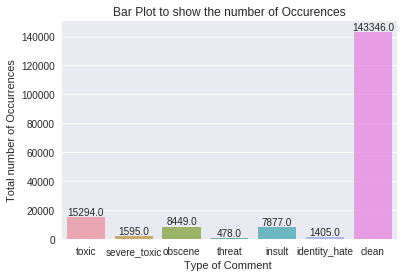

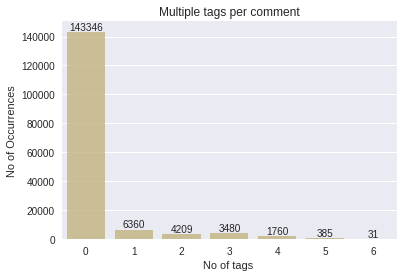

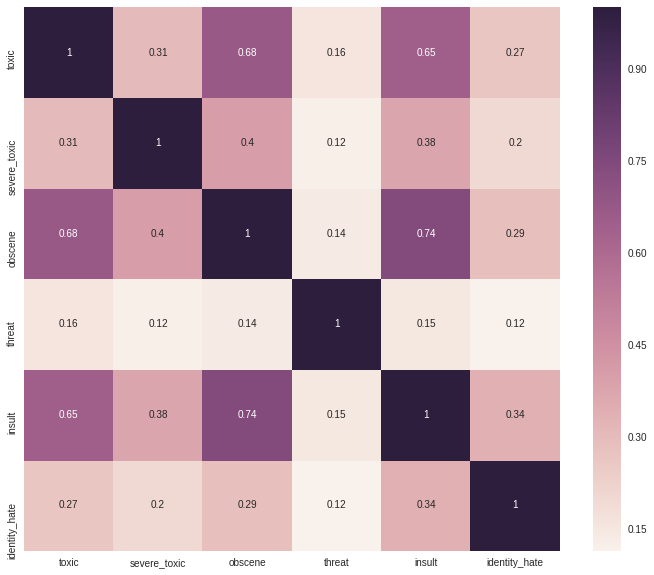

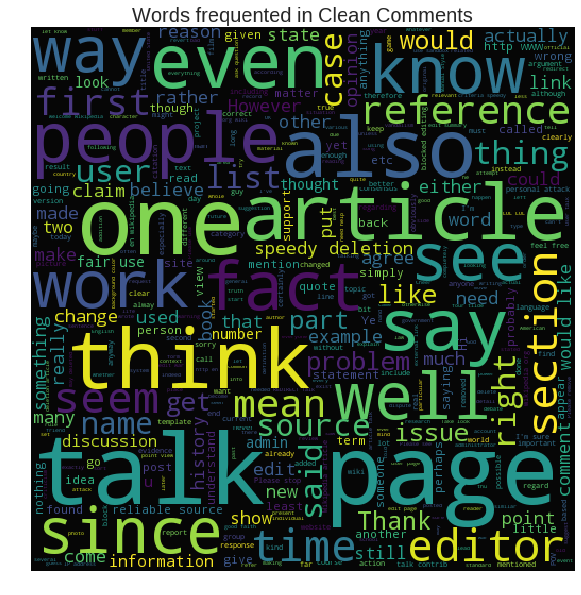

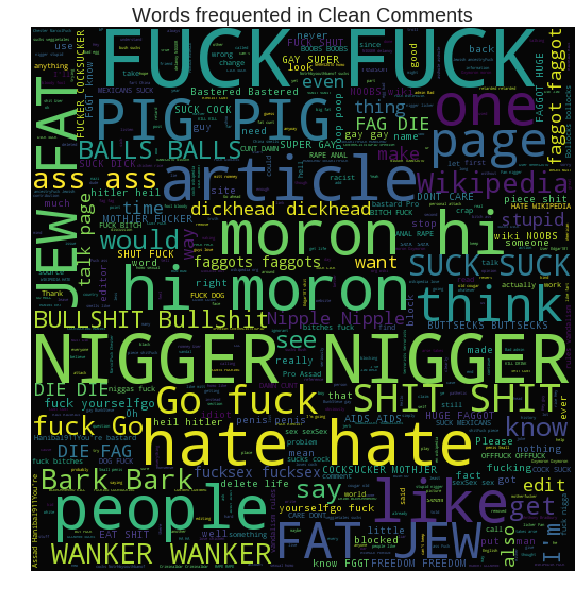

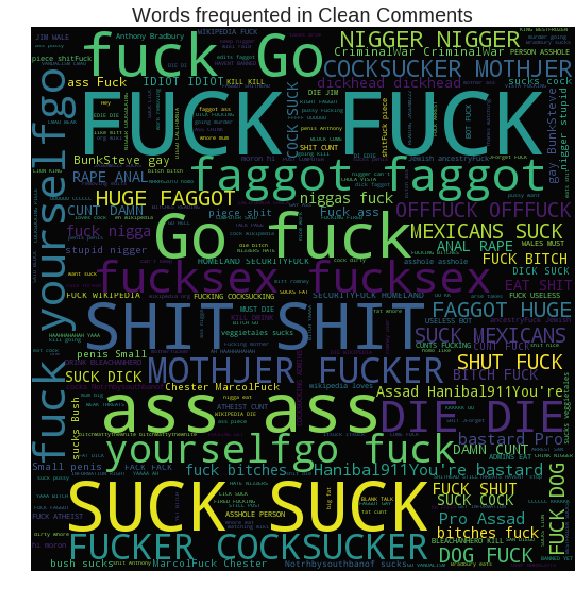

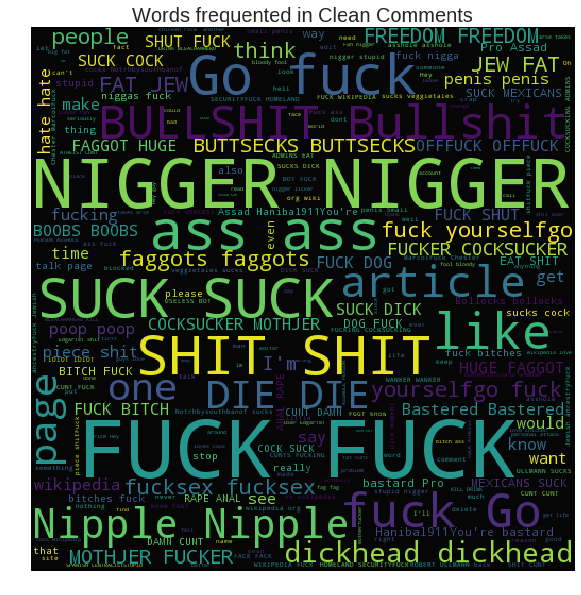

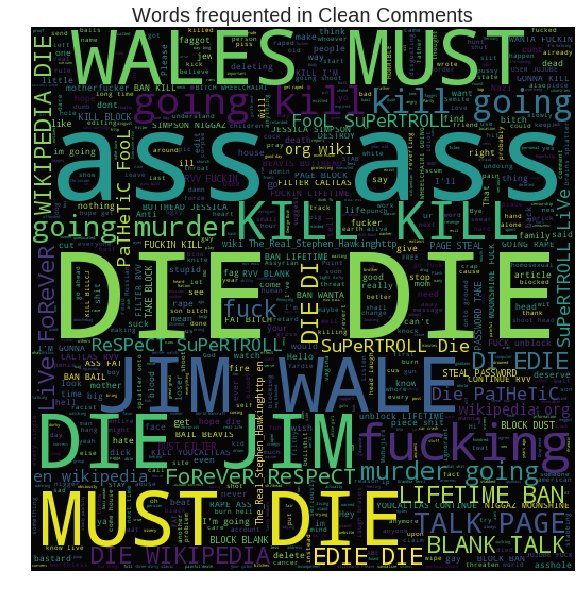

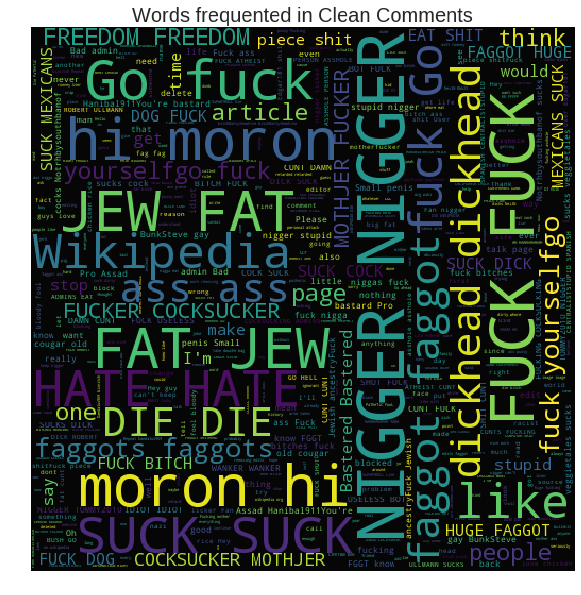

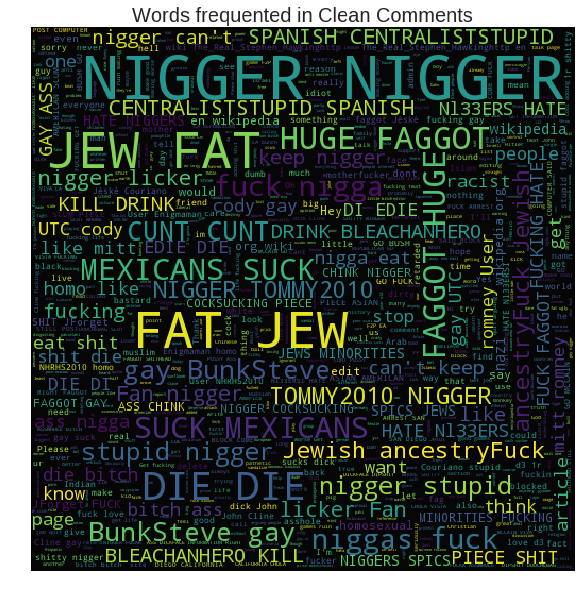

In [50]:
# EDA  

# Settings
colour = sns.color_palette()
sns.set_style("darkgrid")
eng_stopwords = set(stopwords.words("english"))

# Data for EDA
#ADD non tagged comments as clean
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#Bags
bags = ['clean','toxic','severe_toxic','obscene','threat','insult','identity_hate']
data_bag = [bag_clean,bag_toxic,bag_severe_toxic,bag_obscene,bag_threat,bag_insult,bag_identity_hate]
#clean comments
clean=train[train.clean==True]
bag_clean=clean.comment_text.values
#toxic comments
toxic=train[train.toxic==1]
bag_toxic=toxic.comment_text.values
#sever_toxic comments
severe_toxic=train[train.severe_toxic==1]
bag_severe_toxic=severe_toxic.comment_text.values
#obscene comments
obscene=train[train.obscene==1]
bag_obscene=obscene.comment_text.values
#insult comments
insult=train[train.insult==1]
bag_insult=insult.comment_text.values
#threat comments
threat=train[train.threat==1]
bag_threat=threat.comment_text.values
#identity_hate comments
identity_hate=train[train.identity_hate==1]
bag_identity_hate=identity_hate.comment_text.values

# Count of occurences of each TAG
label_freq(train)

# To figure how many multi tags are there
multi_tag(train)

# To check when multi tagged,how many are going to get grouped together
relations(train)

# To segregate data into bags to understand whihch words for which label are the most important.
for bag in data_bag:
  clouds(bag)
  
# To see the top words which are responsible for each category









**Plot Inferences**
1. From the BarPlot it is evident that there is bound to be a class imbalance due to uneven distribution of tags.
2. There are 95K comments in the training Data but the sum of all the tags is 21K, indicating that the same comment can have multiple tags.

1. From the second bar plot it is visible that majority of the comments are single tagged but around 13 K comments are multi tagged. 
2. Hence for a stable model we would need to find probabilities for each label and then set a threshold to determine if a particular tag should be assigned to it or not

1. From the co-relation matrix any relation above above 0.5 can be said to be of importance, this willl help us get an intitution to understand when multi tagged , what labels are going to occur together.
2. During feature selction we can then use this intution to determine whihch features are good or bad. Obscen and insult, toxic and insult, toxic and oscene are generally going to get grouped together. 

1. From the word cloud it is pretty evident that certain words are present in almost all the labels, but it was also intersting to note that certain words were uniqe to a lable. Finding these unique words can help increase the seperability of the classes and allow for better feature selection for model building.



**Now that we have good level of intution about the data, we can start working on building a feature set so that our models can run on them**

# Feature Extraction

In [0]:
# count of words
df['word_count']=df["comment_text"].apply(lambda x: len(re.findall(pattern='[a-zA-Z]{2,25}',string=x)))
# count of unique words
df['unique_word_count']=df["comment_text"].apply(lambda x: len(set([i.lower() for i in re.findall(pattern='[a-zA-Z]{2,25}',string=x)])))
# count of sentences
df['sentence_count']=df["comment_text"].apply(lambda x: len(re.findall(pattern='\n[^(\n)|^( +\n)]',string=x))+1)
# count of exclamation marks
df['exclamation_mark_count']=df["comment_text"].apply(lambda x: len(re.findall(pattern='!',string=x))+1)
# count of uppercase words
df['capital_word_count']=df["comment_text"].apply(lambda x: len(re.findall(pattern='[A-Z]{2,25}',string=x)))
# percentage of unique words out of total words
df['perc_unique_words'] = np.round(df['unique_word_count']/df['word_count'],2)
# percentage of capital words out of total words
df['perc_cap'] = np.round(df['capital_word_count']/df['word_count'],2)

In [0]:
text = pd.concat([train['comment_text'],test['comment_text']]).reset_index(drop=True)

In [0]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    
    D = Xtr[grp_ids].toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)


# modified for multilabel milticlass
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    cols=train_tags.columns
    for col in cols:
        ids = train_tags.index[train_tags[col]==1]
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = classes
        dfs.append(feats_df)
    return dfs
  
  


In [0]:
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'[a-z]{3,}',
    stop_words='english',
    ngram_range=(1, 2),
    max_df = 50000,
    max_features=300)

tfidf.fit(text)
train_features = tfidf.transform(train['comment_text'])

X_train, X_test, y_train, y_test = train_test_split(train_features.toarray(), train[classes], test_size=0.3, random_state=0)


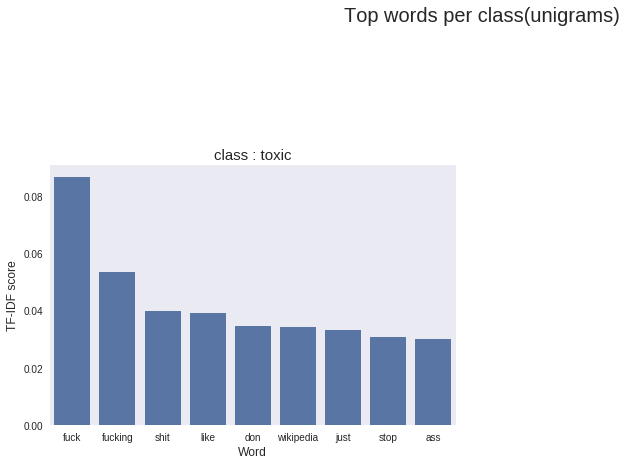

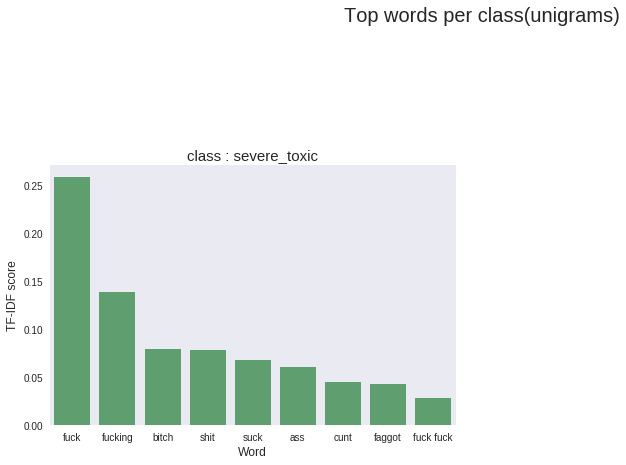

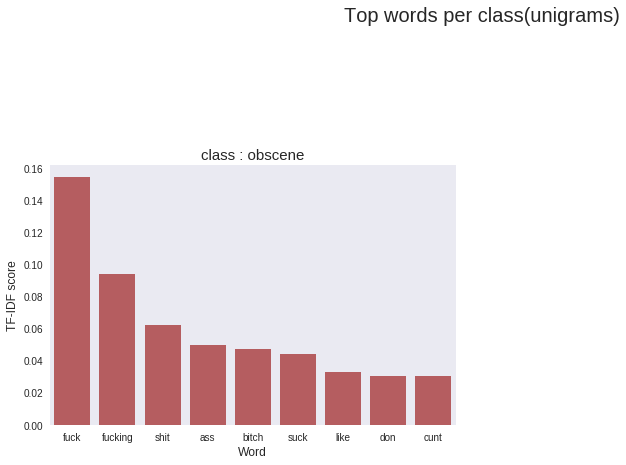

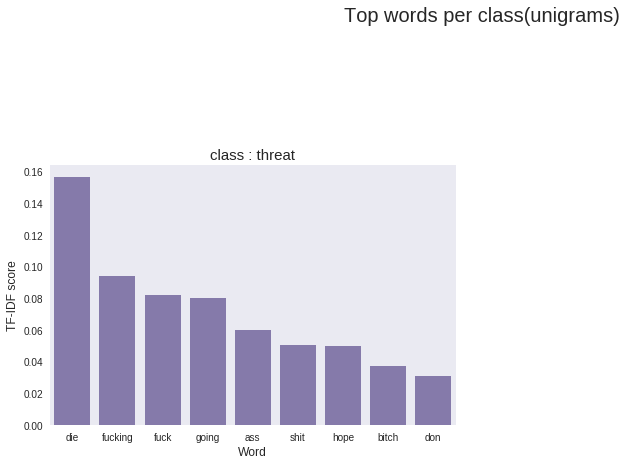

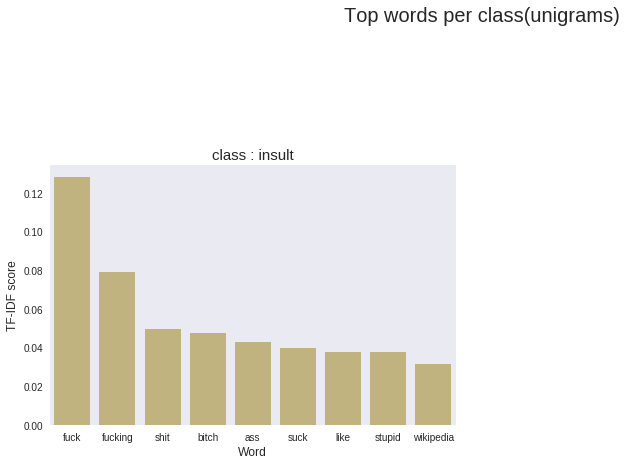

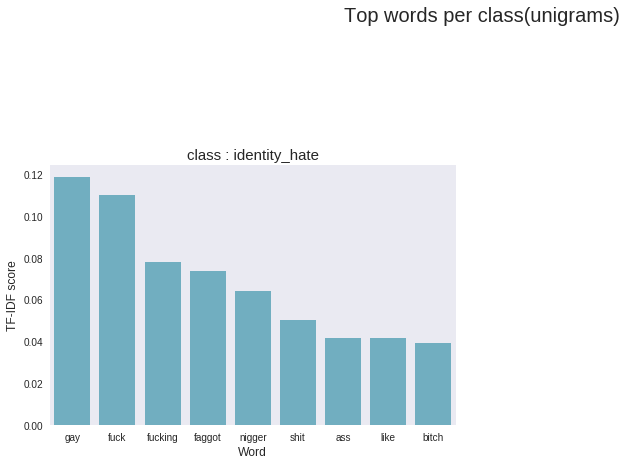

In [20]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from PIL import Image

train_tags=train.iloc[:,2:]
features = np.array(tfidf.get_feature_names())
train_unigrams =  tfidf.transform(text.iloc[:train.shape[0]])
tfidf_top_n_per_class=top_feats_by_class(train_unigrams,features)


tfidf.fit(text)
train_features = tfidf.transform(train['comment_text'])

color = sns.color_palette()
sns.set_style("dark")
i = 0

for clas in classes:
    plt.figure(figsize=(16,22))
    plt.suptitle("Top words per class(unigrams)",fontsize=20)
    gridspec.GridSpec(4,2)
    plt.subplot2grid((4,2),(0,0))
    sns.barplot(tfidf_top_n_per_class[i].feature.iloc[0:9],tfidf_top_n_per_class[i].tfidf.iloc[0:9],color=color[i])
    plt.title("class : {}".format(clas),fontsize=15)
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)
    i= i+1

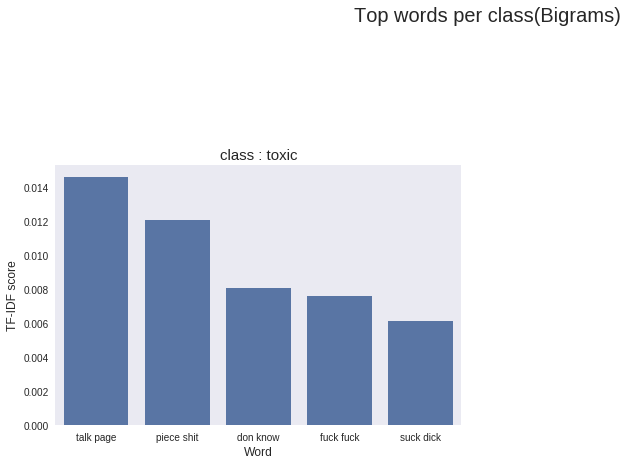

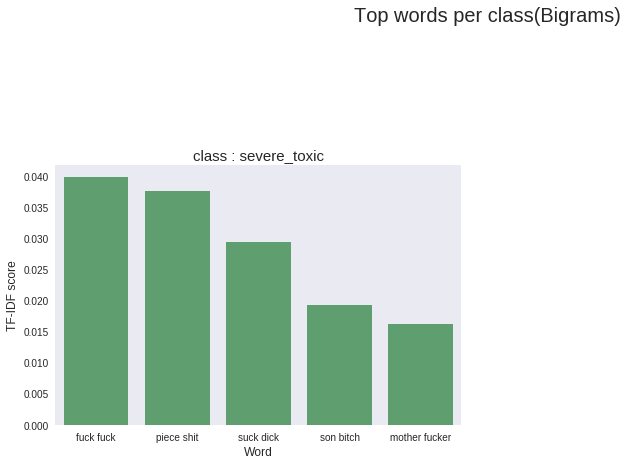

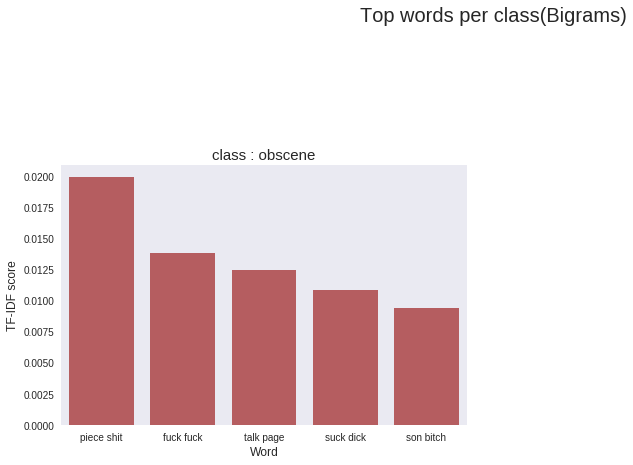

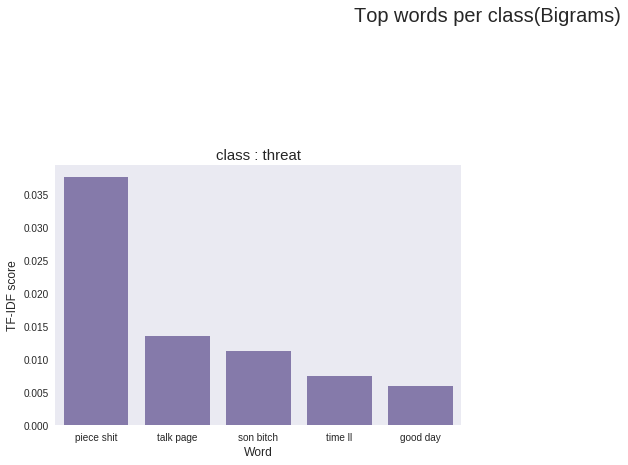

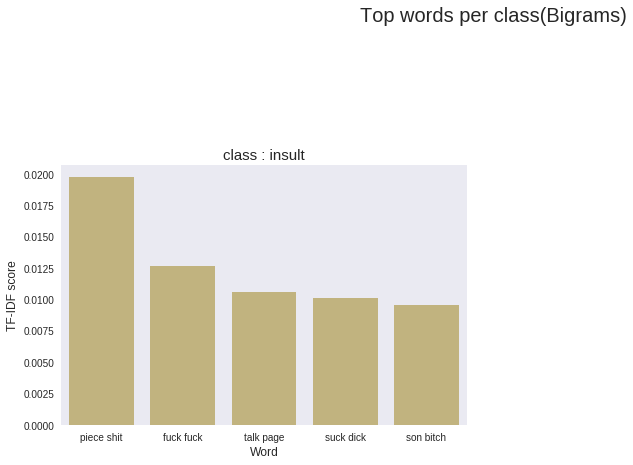

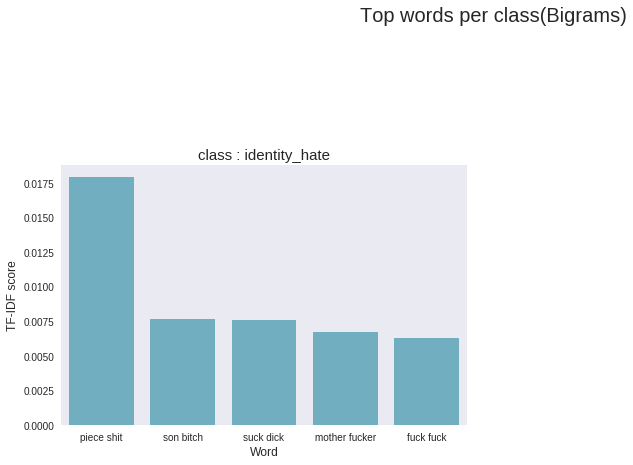

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from PIL import Image

tfv = TfidfVectorizer(min_df=150,  max_features=300, 
            strip_accents='unicode', analyzer='word',ngram_range=(2,2),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')



tfv.fit(text)
features = np.array(tfv.get_feature_names())
train_bigrams =  tfv.transform(text.iloc[:train.shape[0]])
#get top n for bigrams
tfidf_top_n_per_class=top_feats_by_class(train_bigrams,features)
i = 0
for cl in classes:
    plt.figure(figsize=(16,22))
    plt.suptitle("Top words per class(Bigrams)",fontsize=20)
    gridspec.GridSpec(4,2)
    plt.subplot2grid((4,2),(0,0))
    sns.barplot(tfidf_top_n_per_class[i].feature.iloc[0:5],tfidf_top_n_per_class[i].tfidf.iloc[0:5],color=color[i])
    plt.title("class : {}".format(cl),fontsize=15)
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)
    i = i + 1





# EDA with feature set size = 1000

In [0]:
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'[a-z]{3,}',
    stop_words='english',
    ngram_range=(1, 2),
    max_df = 50000,
    max_features=1000)

tfidf.fit(text)
train_features = tfidf.transform(train['comment_text'])

X_train, X_test, y_train, y_test = train_test_split(train_features.toarray(), train[classes], test_size=0.3, random_state=0)

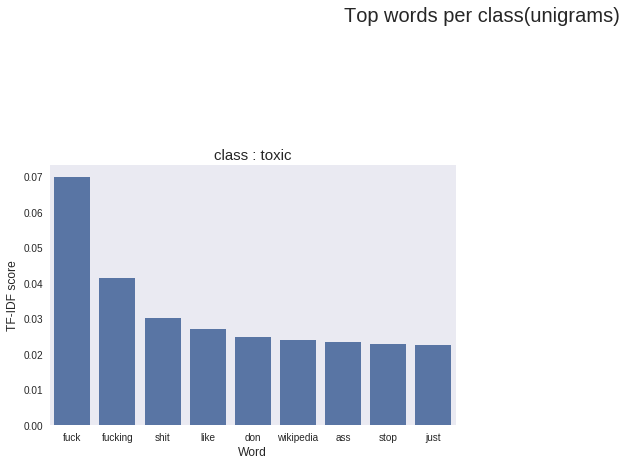

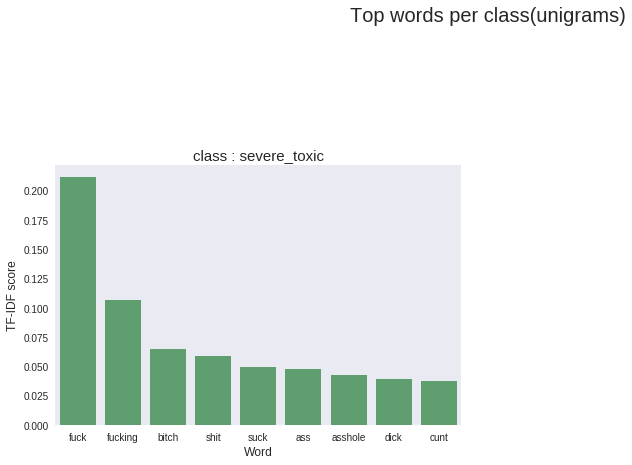

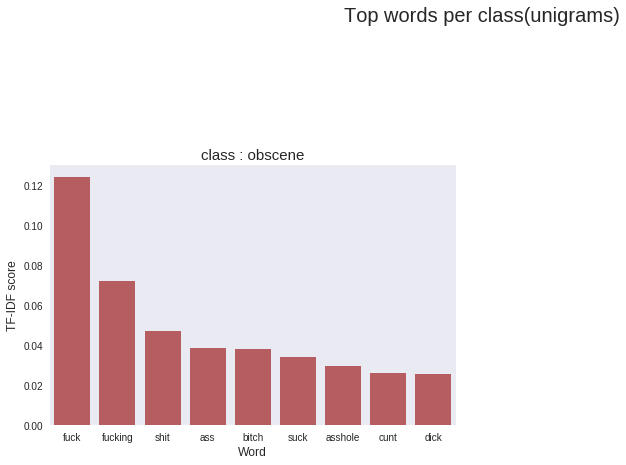

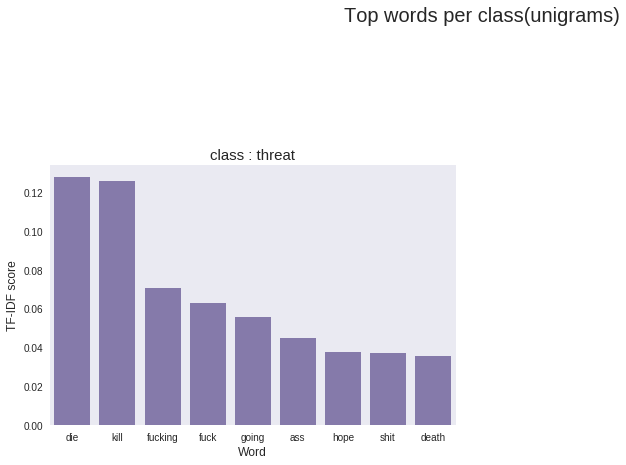

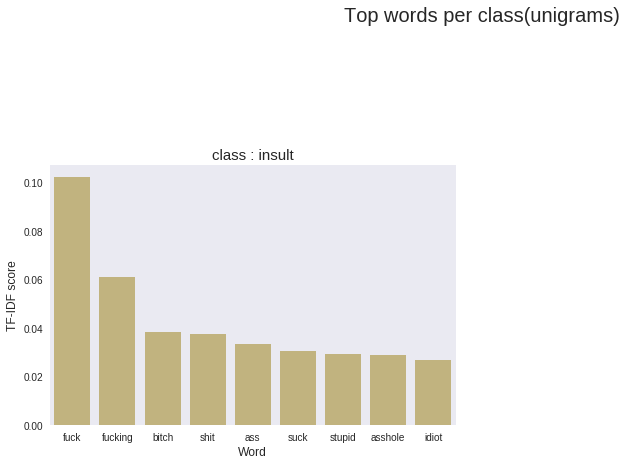

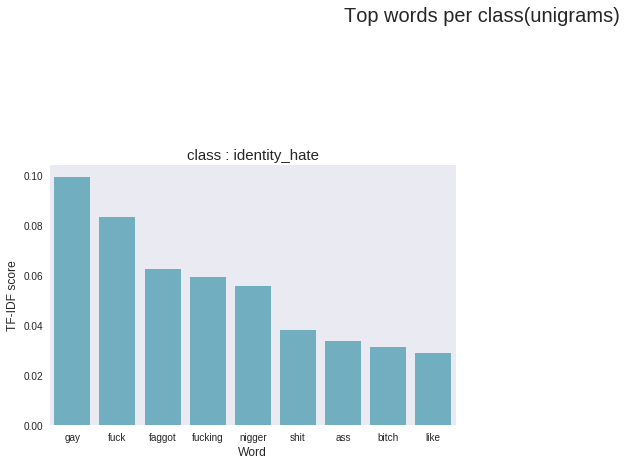

In [23]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from PIL import Image

train_tags=train.iloc[:,2:]
features = np.array(tfidf.get_feature_names())
train_unigrams =  tfidf.transform(text.iloc[:train.shape[0]])
tfidf_top_n_per_class=top_feats_by_class(train_unigrams,features)


tfidf.fit(text)
train_features = tfidf.transform(train['comment_text'])

color = sns.color_palette()
sns.set_style("dark")
i = 0

for clas in classes:
    plt.figure(figsize=(16,22))
    plt.suptitle("Top words per class(unigrams)",fontsize=20)
    gridspec.GridSpec(4,2)
    plt.subplot2grid((4,2),(0,0))
    sns.barplot(tfidf_top_n_per_class[i].feature.iloc[0:9],tfidf_top_n_per_class[i].tfidf.iloc[0:9],color=color[i])
    plt.title("class : {}".format(clas),fontsize=15)
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)
    i= i+1

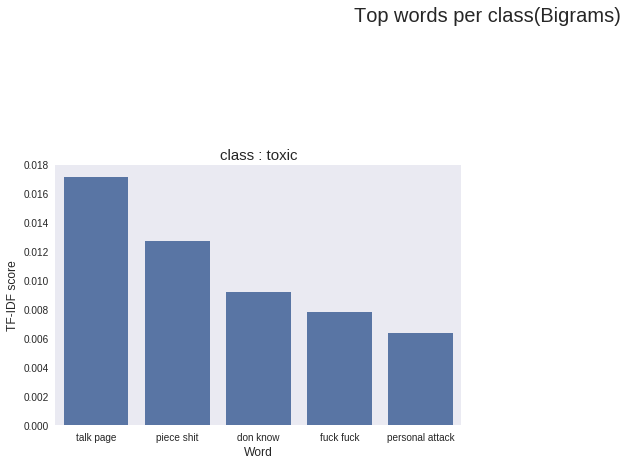

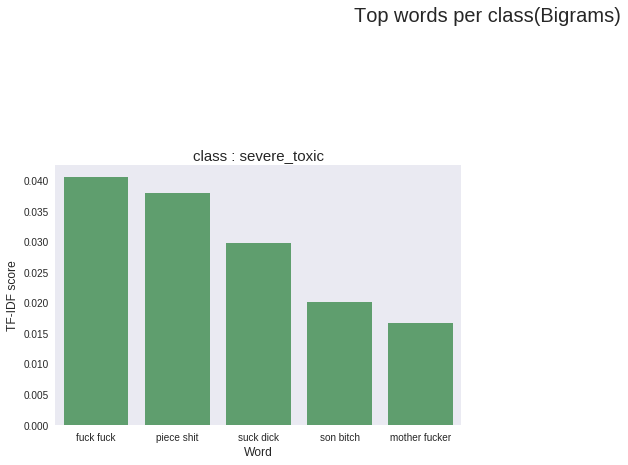

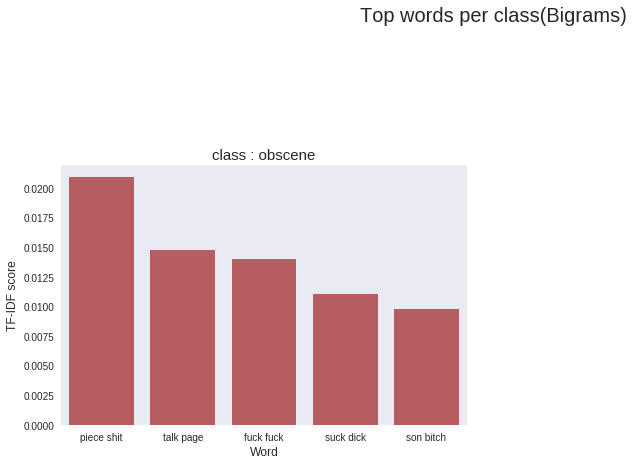

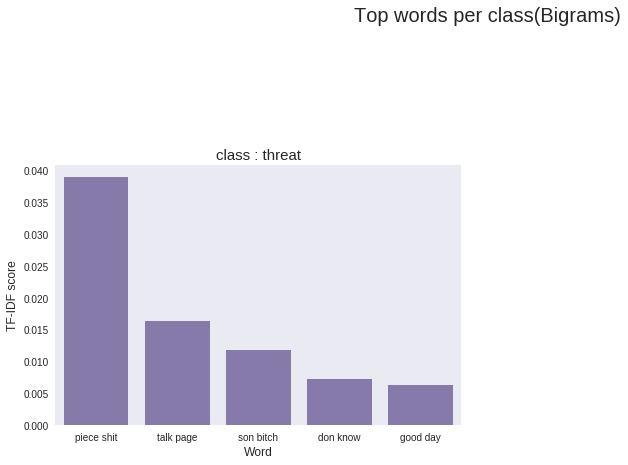

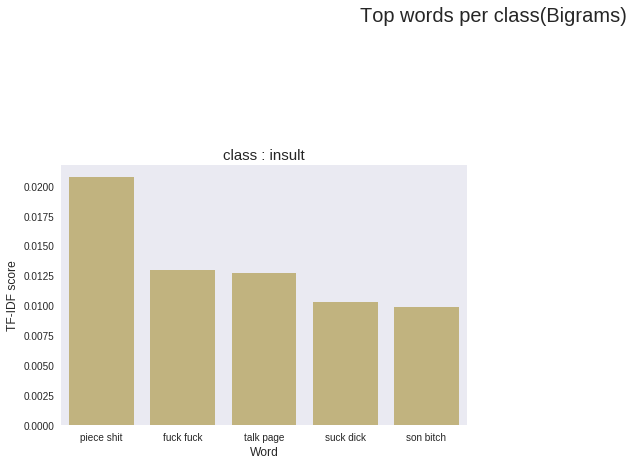

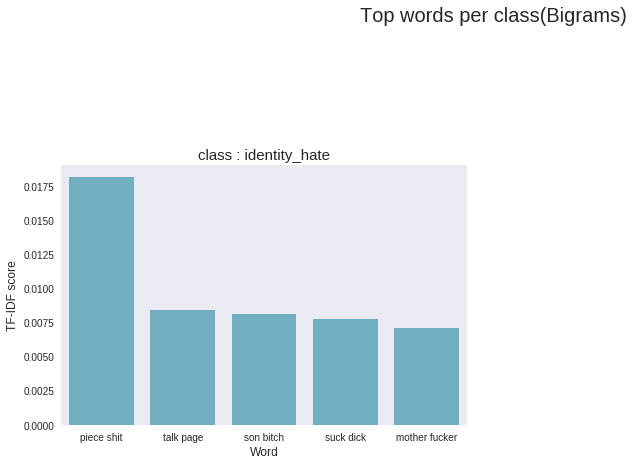

In [24]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from PIL import Image

tfv = TfidfVectorizer(min_df=150,  max_features=1000, 
            strip_accents='unicode', analyzer='word',ngram_range=(2,2),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')



tfv.fit(text)
features = np.array(tfv.get_feature_names())
train_bigrams =  tfv.transform(text.iloc[:train.shape[0]])
#get top n for bigrams
tfidf_top_n_per_class=top_feats_by_class(train_bigrams,features)
i = 0
for cl in classes:
    plt.figure(figsize=(16,22))
    plt.suptitle("Top words per class(Bigrams)",fontsize=20)
    gridspec.GridSpec(4,2)
    plt.subplot2grid((4,2),(0,0))
    sns.barplot(tfidf_top_n_per_class[i].feature.iloc[0:5],tfidf_top_n_per_class[i].tfidf.iloc[0:5],color=color[i])
    plt.title("class : {}".format(cl),fontsize=15)
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)
    i = i + 1


References
1. https://www.kaggle.com/jhoward/nb-svm-strong-linear-baseline
2. https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda
3. https://www.kaggle.com/tunguz/logistic-regression-with-words-and-char-n-grams

Even though the code from the above has not been used(1 top tf-idf snipet), but their ideas were extremely helpful in understanding and solving the problem. 
